# Análisis exploratorio de datos

En este paso trataremos de reposnder preguntas que nos ayuden a entender los datos, visuzalizarlos y poder resolver algunas preguntas empresariales.

In [14]:
# importa las librerias
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# leer conjuntos de datos en los DataFrames

orders_df_c = pd.read_csv('../datasets/clean/orders_df_clean.csv', sep=',')
products_df_c = pd.read_csv('../datasets/clean/products_df_clean.csv', sep=',')
order_product_df_c= pd.read_csv('../datasets/clean/order_product_df_clean.csv', sep=',')
aisles_df_c= pd.read_csv('../datasets/clean/aisles_df_clean.csv', sep=',')
departaments_df_c = pd.read_csv('../datasets/clean/departaments_df_clean.csv', sep=',')

In [16]:
# verificamos que los datos sean sensibles
print(orders_df_c['order_hour_of_day'].min())
print(orders_df_c['order_hour_of_day'].max())
print()
print(orders_df_c['order_hour_of_day'].value_counts().sort_index())

0
23

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64


In [17]:
print(orders_df_c['order_dow'].min())
print(orders_df_c['order_dow'].max())
print()
print(sorted(orders_df_c['order_dow'].unique()))

0
6

[0, 1, 2, 3, 4, 5, 6]


Para ambas columnas los valores son congruentes con lo que debe reflejar 24 horas en el día y 7 días de la semana.

### 1. Para cada hora del día, ¿cuántas personas hacen órdenes?

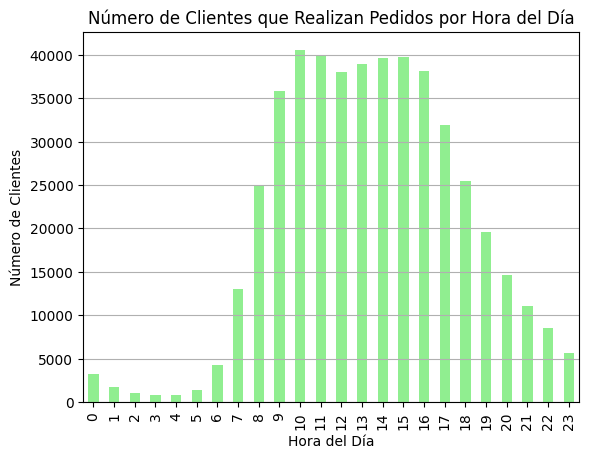

In [18]:
#customers_per_hour = orders_df.groupby('order_hour_of_day')['user_id'].nunique()
customers_per_hour = orders_df_c.groupby('order_hour_of_day')['user_id'].count()

customers_per_hour.plot(x='order_hour_of_day', y='user_id', kind='bar', legend=False, color='lightgreen')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes que Realizan Pedidos por Hora del Día')
plt.grid(axis='y')
plt.show()

El horario con mayores pedidos es de 9:00 am a 4:00 pm.

### 2. ¿Qué día de la semana compran víveres las personas?

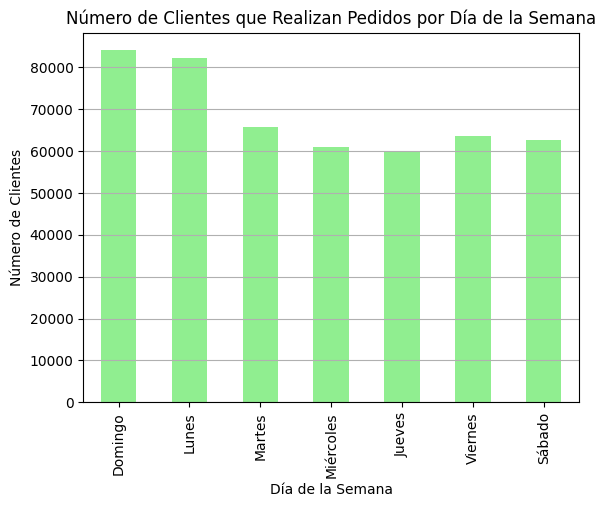

In [19]:
customers_per_day = orders_df_c.groupby('order_dow')['user_id'].count()

customers_per_day.plot(x='order_dow', y='user_id', kind='bar', legend=False, color='lightgreen')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes que Realizan Pedidos por Día de la Semana')
plt.xticks(range(7), ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])
plt.grid(axis='y')
plt.show()

Las personas tienden a realizar sus compras a inicio de la semana para abastecer su semana.

### 3. ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

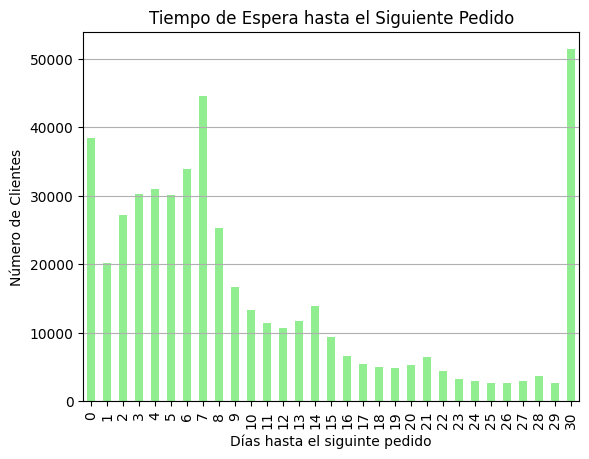

In [20]:
since_order = orders_df_c.groupby('days_since_prior_order')['user_id'].count()

since_order.plot(x='days_since_prior_order', y='user_id', kind='bar', legend=False, color='lightgreen')
plt.xlabel('Días hasta el siguinte pedido')
plt.ylabel('Número de Clientes')
plt.title('Tiempo de Espera hasta el Siguiente Pedido')
plt.grid(axis='y')
plt.show()

Podemos obervar que hay 3 días con mayor frecuencia, el primer pedido que se representa por cero, el segundo día con mayor frecuencia es 7 ya que podriamos asegurar que las personas realizan sus pedidos por semana y el tercer día de espera es cada 30 días, que las personas tienden a realizar su pedido mensualmente.

***Podemos decir que el 30 días es el de mayor frecuencia para realizar pedidos por los clientes

### 4. Diferencia entre miércoles y sábados para 'order_hour_of_day'. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [21]:
wednesday_customers_per_hour = orders_df_c.query("order_dow == 3")
saturday_customers_per_hour = orders_df_c.query("order_dow == 6")

In [22]:
customers_per_hour_m = wednesday_customers_per_hour.groupby('order_hour_of_day')['user_id'].count()
customers_per_hour_s = saturday_customers_per_hour.groupby('order_hour_of_day')['user_id'].count()

In [23]:
customers_concat = pd.concat([customers_per_hour_m,customers_per_hour_s], axis='columns')
customers_concat.columns = ['pedidos_miercoles','pedidos_sabado'] 
print(customers_concat)

                   pedidos_miercoles  pedidos_sabado
order_hour_of_day                                   
0                                373             464
1                                215             254
2                                106             177
3                                101             125
4                                108             118
5                                170             161
6                                643             451
7                               1732            1619
8                               3125            3246
9                               4490            4311
10                              5026            4919
11                              5004            5116
12                              4688            5132
13                              4674            5323
14                              4774            5375
15                              5163            5188
16                              4976          

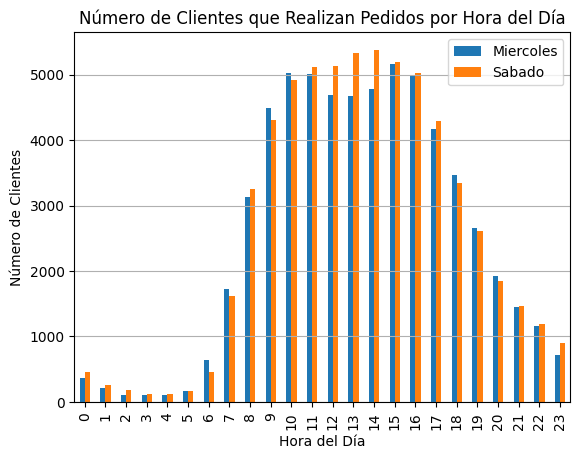

In [24]:
customers_concat.plot(kind='bar', legend = True)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes que Realizan Pedidos por Hora del Día')
plt.grid(axis='y')
plt.legend(['Miercoles','Sabado'])
plt.show()

Se realizan más pedidos los días sabados a partir de medio día, sin embrago los días miercoles a primeras horas del día se registran más pedidos entre 6:00 am y 10:00 am y al final de día entre 6:00 pm y 8:00 pm

### 5. ¿Cuál es la distribución para el número de pedidos por cliente?

In [25]:
#Grafica la distribución para el número de órdenes que hacen los clientes 
#(es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, 
#y así sucesivamente...).

orders_count_per_user = orders_df_c.groupby('order_number')['user_id'].count().reset_index()
print(orders_count_per_user)

    order_number  user_id
0              1    28817
1              2    28633
2              3    28685
3              4    28703
4              5    25661
..           ...      ...
95            96      220
96            97      221
97            98      191
98            99      169
99           100      194

[100 rows x 2 columns]


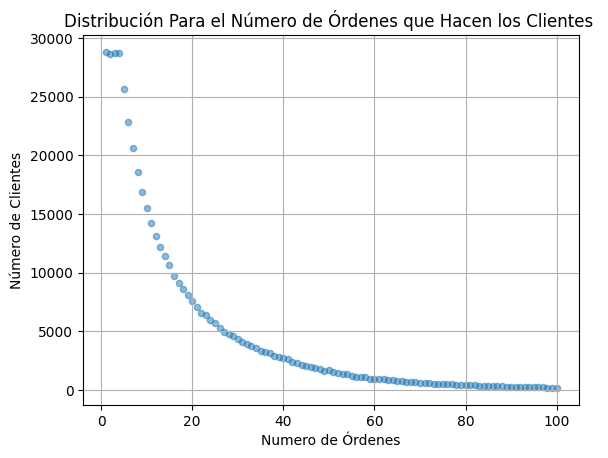

In [26]:
orders_count_per_user.plot(kind='scatter', x='order_number', y='user_id', alpha=.5)
plt.xlabel('Numero de Órdenes')
plt.ylabel('Número de Clientes')
plt.title('Distribución Para el Número de Órdenes que Hacen los Clientes ')
plt.grid()
plt.show()

Por lo que podemos ver es que existe un problema de retención de clientes, ya que la mayoria empieza por 1 pedido pero va bajando a medida que va en aumento el numero de ordenes.

### 6. ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [27]:
#print(orders_df.head())
merge_1 = orders_df_c.merge(order_product_df_c, on='order_id', how = 'left')
merge_orders_df = merge_1.merge(products_df_c, on='product_id', how = 'left')
print(merge_orders_df)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4573908   2071924     1730            18          1                 14   
4573909   2071924     1730            18          1                 14   
4573910   2071924     1730            18          1                 14   
4573911   2071924     1730            18          1                 14   
4573912   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            30   

In [28]:
popular_items = merge_orders_df.groupby('product_name')['user_id'].count().sort_values(ascending=False).reset_index()
popular_items.columns=['product_name','cantidad de pedidos']
products_id_name = popular_items.head(20)
print(products_id_name)

                product_name  cantidad de pedidos
0                     BANANA                66050
1     BAG OF ORGANIC BANANAS                53297
2       ORGANIC STRAWBERRIES                37039
3       ORGANIC BABY SPINACH                33971
4       ORGANIC HASS AVOCADO                29773
5            ORGANIC AVOCADO                24689
6                LARGE LEMON                21495
7               STRAWBERRIES                20018
8                      LIMES                19690
9         ORGANIC WHOLE MILK                19600
10       ORGANIC RASPBERRIES                19197
11      ORGANIC YELLOW ONION                15898
12            ORGANIC GARLIC                15292
13          ORGANIC ZUCCHINI                14584
14       ORGANIC BLUEBERRIES                13879
15            CUCUMBER KIRBY                13675
16        ORGANIC FUJI APPLE                12544
17             ORGANIC LEMON                12232
18  APPLE HONEYCRISP ORGANIC                11993


In [29]:
print('Lista de los productos mas populares')
print()
print(products_df_c.query("product_name in @products_id_name.product_name")[['product_id','product_name']])

Lista de los productos mas populares

       product_id              product_name
5741         5876             ORGANIC LEMON
8079         8277  APPLE HONEYCRISP ORGANIC
12832       13176    BAG OF ORGANIC BANANAS
16360       16797              STRAWBERRIES
20593       21137      ORGANIC STRAWBERRIES
21338       21903      ORGANIC BABY SPINACH
22346       22935      ORGANIC YELLOW ONION
24210       24852                    BANANA
24321       24964            ORGANIC GARLIC
25528       26209                     LIMES
27120       27845        ORGANIC WHOLE MILK
27238       27966       ORGANIC RASPBERRIES
27467       28204        ORGANIC FUJI APPLE
38237       39275       ORGANIC BLUEBERRIES
39624       40706    ORGANIC GRAPE TOMATOES
43786       45007          ORGANIC ZUCCHINI
45925       47209      ORGANIC HASS AVOCADO
46321       47626               LARGE LEMON
46460       47766           ORGANIC AVOCADO
48327       49683            CUCUMBER KIRBY


Los clientes tienden a comprar más productos organicos en la aplicación.

### 7. ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [30]:
count_items_per_order=order_product_df_c.groupby('order_id')['add_to_cart_order'].count().reset_index()
count_items_per_order.columns=['order_id','numero_de_productos_por_pedido']
print(count_items_per_order)

        order_id  numero_de_productos_por_pedido
0              4                              13
1              9                              15
2             11                               5
3             19                               3
4             20                               8
...          ...                             ...
450041   3421034                              17
450042   3421053                               9
450043   3421071                               5
450044   3421077                               4
450045   3421079                               1

[450046 rows x 2 columns]


In [31]:
counts_items = count_items_per_order.groupby('numero_de_productos_por_pedido').count().reset_index()
counts_items.columns=['numero_de_productos_por_pedido','cantidad_de_pedidos']
print(counts_items.sort_values(by='cantidad_de_pedidos', ascending=False))

    numero_de_productos_por_pedido  cantidad_de_pedidos
4                                5                31923
5                                6                31698
3                                4                31054
6                                7                30822
2                                3                29046
..                             ...                  ...
78                              80                    1
81                              87                    1
79                              85                    1
71                              72                    1
89                             127                    1

[90 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

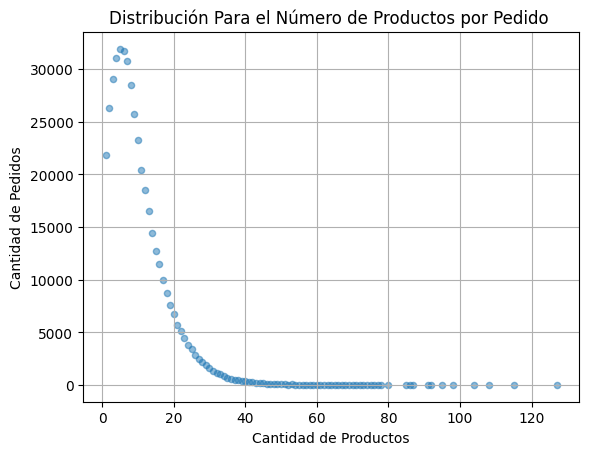

In [32]:
counts_items.plot(kind='scatter', x='numero_de_productos_por_pedido', y='cantidad_de_pedidos', alpha=.5)
plt.xlabel('Cantidad de Productos')
plt.ylabel('Cantidad de Pedidos')
plt.title('Distribución Para el Número de Productos por Pedido ')
plt.grid()
plt.show

La mayor cantidad de pedidos suelen comprar hasta 5 productos por pedido, luego va en bajada, entre mas cantidad de productos se compran menos pedidos se realizan.

### 8. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [33]:
reorder_filtered = merge_orders_df.query("reordered == 1")

In [34]:
reorder_popular_items = reorder_filtered.groupby('product_name')['user_id'].count().sort_values(ascending=False).reset_index()
reorder_popular_items.columns=['product_name','cantidad_de_pedidos']
reorder_products_id_name = reorder_popular_items.head(20)
print(reorder_products_id_name)

                product_name  cantidad_de_pedidos
0                     BANANA                55763
1     BAG OF ORGANIC BANANAS                44450
2       ORGANIC STRAWBERRIES                28639
3       ORGANIC BABY SPINACH                26233
4       ORGANIC HASS AVOCADO                23629
5            ORGANIC AVOCADO                18743
6         ORGANIC WHOLE MILK                16251
7                LARGE LEMON                15044
8        ORGANIC RASPBERRIES                14748
9               STRAWBERRIES                13945
10                     LIMES                13327
11      ORGANIC YELLOW ONION                11145
12            ORGANIC GARLIC                10411
13          ORGANIC ZUCCHINI                10076
14            CUCUMBER KIRBY                 9538
15        ORGANIC FUJI APPLE                 8989
16  APPLE HONEYCRISP ORGANIC                 8836
17       ORGANIC BLUEBERRIES                 8799
18             ORGANIC LEMON                 8412


In [35]:
print('Lista de los productos mas populares que se vuelven a ordernar')
print()
print(products_df_c.query("product_name in @reorder_products_id_name.product_name")[['product_id','product_name']])

Lista de los productos mas populares que se vuelven a ordernar

       product_id              product_name
5741         5876             ORGANIC LEMON
8079         8277  APPLE HONEYCRISP ORGANIC
12832       13176    BAG OF ORGANIC BANANAS
16360       16797              STRAWBERRIES
20593       21137      ORGANIC STRAWBERRIES
21338       21903      ORGANIC BABY SPINACH
22346       22935      ORGANIC YELLOW ONION
24210       24852                    BANANA
24321       24964            ORGANIC GARLIC
25528       26209                     LIMES
27120       27845        ORGANIC WHOLE MILK
27238       27966       ORGANIC RASPBERRIES
27467       28204        ORGANIC FUJI APPLE
38237       39275       ORGANIC BLUEBERRIES
43786       45007          ORGANIC ZUCCHINI
45925       47209      ORGANIC HASS AVOCADO
46321       47626               LARGE LEMON
46460       47766           ORGANIC AVOCADO
47893       49235       ORGANIC HALF & HALF
48327       49683            CUCUMBER KIRBY


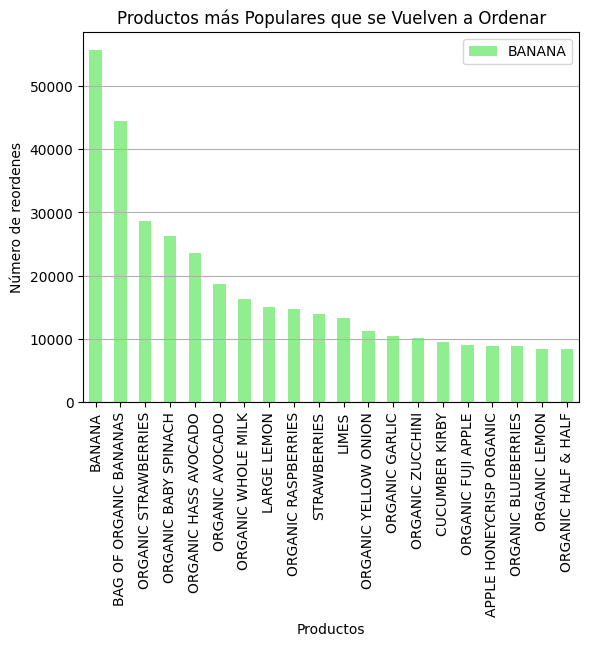

In [36]:
nombre_x = reorder_products_id_name['product_name']

reorder_products_id_name.plot(kind='bar', x='product_name', y='cantidad_de_pedidos', color='lightgreen', legend=False)
plt.xlabel('Productos')
plt.ylabel('Número de reordenes')
plt.title('Productos más Populares que se Vuelven a Ordenar')
plt.legend(nombre_x)
plt.grid(axis='y')
plt.show()

Observamos que las bananas son muy populares para ordenar y reordenar.

### 9. Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [37]:
#Para cada producto, ¿cuál es la tasa de repetición del pedido 
#(número de repeticiones de pedido/total de pedidos?

reorder_counts = merge_orders_df.groupby('product_id')['reordered'].sum().reset_index()
reorder_counts.columns = ['product_id','total_reorders']
print(reorder_counts)
total_counts = merge_orders_df.groupby('product_id')['order_id'].count().reset_index()
total_counts.columns = ['product_id','total_orders']
print(total_counts)

       product_id  total_reorders
0             1.0           158.0
1             2.0             0.0
2             3.0            31.0
3             4.0            25.0
4             7.0             1.0
...           ...             ...
45568     49690.0             4.0
45569     49691.0            31.0
45570     49692.0             5.0
45571     49693.0            11.0
45572     49694.0             3.0

[45573 rows x 2 columns]
       product_id  total_orders
0             1.0           280
1             2.0            11
2             3.0            42
3             4.0            49
4             7.0             2
...           ...           ...
45568     49690.0             5
45569     49691.0            72
45570     49692.0            12
45571     49693.0            25
45572     49694.0             9

[45573 rows x 2 columns]


In [38]:
repetition_merged_df = reorder_counts.merge(total_counts, on='product_id')
repetition_merged_df['reorder_rate'] = repetition_merged_df['total_reorders'] / repetition_merged_df['total_orders']
print(repetition_merged_df)

       product_id  total_reorders  total_orders  reorder_rate
0             1.0           158.0           280      0.564286
1             2.0             0.0            11      0.000000
2             3.0            31.0            42      0.738095
3             4.0            25.0            49      0.510204
4             7.0             1.0             2      0.500000
...           ...             ...           ...           ...
45568     49690.0             4.0             5      0.800000
45569     49691.0            31.0            72      0.430556
45570     49692.0             5.0            12      0.416667
45571     49693.0            11.0            25      0.440000
45572     49694.0             3.0             9      0.333333

[45573 rows x 4 columns]


In [39]:
print('Tasa de repetición por producto')
print()
print(repetition_merged_df.merge(products_df_c, on='product_id')[['product_id','reorder_rate','product_name']])

Tasa de repetición por producto

       product_id  reorder_rate  \
0             1.0      0.564286   
1             2.0      0.000000   
2             3.0      0.738095   
3             4.0      0.510204   
4             7.0      0.500000   
...           ...           ...   
44511     49684.0      0.000000   
44512     49685.0      0.500000   
44513     49686.0      0.625000   
44514     49687.0      0.000000   
44515     49688.0      0.111111   

                                            product_name  
0                             CHOCOLATE SANDWICH COOKIES  
1                                       ALL-SEASONS SALT  
2                   ROBUST GOLDEN UNSWEETENED OOLONG TEA  
3      SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...  
4                         PURE COCONUT WATER WITH ORANGE  
...                                                  ...  
44511          VODKA- TRIPLE DISTILLED- TWIST OF VANILLA  
44512                 EN CROUTE ROAST HAZELNUT CRANBERRY  
44513          

Ahora podemos ver que productos tienen un porcentaje alto de reorden y poder determinar ciertos re-stocks en la aplicación.

### 10. Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [40]:
#Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
user_reorder_counts = merge_orders_df.groupby('user_id')['reordered'].sum().reset_index()
user_reorder_counts.columns = ['user_id','total_reorders']
print(user_reorder_counts)
user_total_counts = merge_orders_df.groupby('user_id')['order_id'].count().reset_index()
user_total_counts.columns = ['user_id','total_orders']
print(user_total_counts)

        user_id  total_reorders
0             2             1.0
1             4             0.0
2             5             8.0
3             6             0.0
4             7            13.0
...         ...             ...
157432   206203             6.0
157433   206206            15.0
157434   206207            41.0
157435   206208            87.0
157436   206209             8.0

[157437 rows x 2 columns]
        user_id  total_orders
0             2            26
1             4             3
2             5            12
3             6             5
4             7            14
...         ...           ...
157432   206203            27
157433   206206            21
157434   206207            46
157435   206208           125
157436   206209            25

[157437 rows x 2 columns]


In [41]:
print('Tasa de repetición de pedido para cada usuario')
print()
user_repetition_merged_df = user_reorder_counts.merge(user_total_counts, on='user_id')
user_repetition_merged_df['reorder_rate'] = user_repetition_merged_df['total_reorders'] / user_repetition_merged_df['total_orders']
print(user_repetition_merged_df)

Tasa de repetición de pedido para cada usuario

        user_id  total_reorders  total_orders  reorder_rate
0             2             1.0            26      0.038462
1             4             0.0             3      0.000000
2             5             8.0            12      0.666667
3             6             0.0             5      0.000000
4             7            13.0            14      0.928571
...         ...             ...           ...           ...
157432   206203             6.0            27      0.222222
157433   206206            15.0            21      0.714286
157434   206207            41.0            46      0.891304
157435   206208            87.0           125      0.696000
157436   206209             8.0            25      0.320000

[157437 rows x 4 columns]


Ahora ya podemos ver la tasa de reorden, con esta información se podrian lanzar compañas personalizadas para que vuelvan a comprar ciertos productos que el usuario ya ha probado.

### 11. ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [42]:
#(muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el 
#primer artículo en añadirse al carrito)?
filtered_cart_order = merge_orders_df.query("add_to_cart_order == 1")
print(filtered_cart_order)


         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
16        1690866   163593             5          5                 12   
24        1454967    39980             4          5                 19   
38        1768857    82516            56          0                 20   
46        3007858   196724             2          4                 12   
...           ...      ...           ...        ...                ...   
4573860   3210681     5617             5          1                 14   
4573869   3270802   112087             2          3                 13   
4573880    885349    82944            16          2                 11   
4573890    216274     4391             3          3                  8   
4573910   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            30   

In [43]:
group_cart_order = filtered_cart_order.groupby('product_name').count().reset_index().sort_values(by='add_to_cart_order', ascending=False)
print(group_cart_order)

                                            product_name  order_id  user_id  \
1907                                              BANANA     15562    15562   
1792                              BAG OF ORGANIC BANANAS     11026    11026   
17462                                 ORGANIC WHOLE MILK      4363     4363   
17104                               ORGANIC STRAWBERRIES      3946     3946   
16030                               ORGANIC HASS AVOCADO      3390     3390   
...                                                  ...       ...      ...   
12050  LIGHT & FIT STRAWBERRY CHEESECAKE GREEK NONFAT...         1        1   
12049                LIGHT & FIT STAWBERRY NONFAT YOGURT         1        1   
6585   DELICATE WAFERS LAYERED WITH CHOCOLATE CREME A...         1        1   
12048                   LIGHT & FIT PEACH NON-FAT YOGURT         1        1   
6832   DISINFECTANT MULTI-SURFACE CLEANER RAINSHOWER ...         1        1   

       order_number  order_dow  order_hour_of_day  

In [44]:
first_product_per_order = group_cart_order[['product_name','add_to_cart_order']]
first_product_per_order.columns = ['product_name','first_product_per_order']
print('Lista de productos que se añadieron primero al carrito')
print()
print(first_product_per_order.head(20))

Lista de productos que se añadieron primero al carrito

                      product_name  first_product_per_order
1907                        BANANA                    15562
1792        BAG OF ORGANIC BANANAS                    11026
17462           ORGANIC WHOLE MILK                     4363
17104         ORGANIC STRAWBERRIES                     3946
16030         ORGANIC HASS AVOCADO                     3390
15076         ORGANIC BABY SPINACH                     3336
15054              ORGANIC AVOCADO                     3044
22686                 SPRING WATER                     2336
22928                 STRAWBERRIES                     2308
16723          ORGANIC RASPBERRIES                     2024
22433   SPARKLING WATER GRAPEFRUIT                     1914
16013          ORGANIC HALF & HALF                     1797
11701                  LARGE LEMON                     1737
22128                         SODA                     1733
16805     ORGANIC REDUCED FAT MILK          

Lo que los usuarios más buscan son los productos organicos, además de que las bananas son de los productos más populares en la aplicación.

En base al procesamiento y análisis de proyecto, podemos observar diferentes patrones como:

* Identificación de los productos más populares, asi podemos podemos mantener un stock en la aplicación, y tener a los clientes satisfechos sabiendo que siempre podran encontra lo que buscan.
* El comportamiento del clientes, asi podriamos segementar a los clientes y entender mejor sus necesidades y poder realizar compañas en base a su tasa de repeticón de productos.
* Mejorar la experiencia del cliente en base a sus gustos y así podriamos sugerir productos similares a otros clientes con preferencias parecidas.
* Enviar promociones o descuentos de productos que muy probablemente vuelva a comprar.